##Tutorial on Lasagne, a Theano based neural network framework.

### Jeremy Kirkwood
Kaggler, highest rank 937th

PUG Talk based on Daniel Nouri tutorial at http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from utils import showimg
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from utils import add_circle, add_rect, load
def elevator_pitch_example(num):
    X, y = load(20, standarize=False,shrink=False)
    fig, axs = plt.subplots(2,num,figsize=(10,5))
    fig.tight_layout()
    for i, ax in enumerate(fig.axes):
        ax.imshow(X[i].swapaxes(0,2).swapaxes(0,1))
def normalized_images(num):
    X, y = load(20, standarize=True,shrink=False)
    fig, axs = plt.subplots(1,num,figsize=(10,10))
    fig.tight_layout()
    for i, ax in enumerate(fig.axes):
        ax.imshow(X[i].swapaxes(0,2).swapaxes(0,1))

####Overview
#####To demonstrate the usefulness of the Lasagne package.


#####Using an artifical feature set as an example

#####This allows us to simulate as much data as we would like. 

#####To show how a neural network can be effective at identifing patterns if given enough data to work with.

###What is Lasagne?
Lasagne is an open source neural network framework

Allows for the easy creation and use of neural networks
https://github.com/Lasagne/Lasagne

Lasagne uses the Theano library to optimize the weights of the given neural network under a given cost function.

The library Nolearn written by Daniel Nouri will allow us to quickly create our neural networks within Lasagne

Our dataset will consist of pics of the Governator "captioned" with red shapes. 40 pictures to choose from!

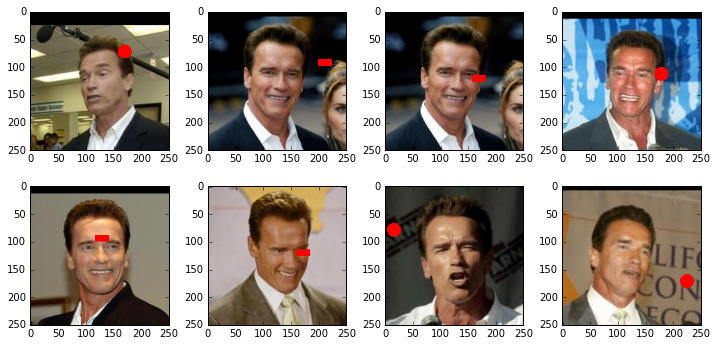

In [42]:
elevator_pitch_example(4)

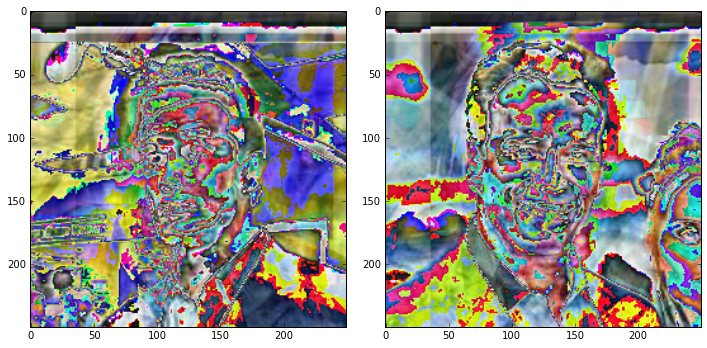

In [47]:
normalized_images(2)

Attempt to detect if rectangle or cirle has been placed onto the picture.

Lets use a Neual Network to inspect images and predict which shape has been placed into the images.

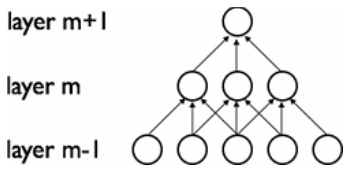

In [5]:
# Neural Networks
showimg("sparse_1D_nn.png")

In [65]:
from lasagne import layers, nonlinearities
from nolearn.lasagne import NeuralNet

In [31]:
from lasagne.updates import nesterov_momentum

size_x = 48
size_y = 48
channels = 3
net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, size_x, size_y, channels),
    hidden_num_units=200,  # number of units in hidden layer
    output_nonlinearity=nonlinearities.softmax, # Useful in classification setup
    output_num_units=2,  # 2 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're dealing with classification problem
    max_epochs=40,
    verbose=1,
    )
X, y = load(4000)
net1.fit(X, y)

# Neural Network with 1383002 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   48x48x3
  1  hidden  200
  2  output  2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.13619       0.75461      1.50566      0.52381  2.45s
      2       0.71803       0.70521      1.01817      0.51028  2.44s
      3       0.70576       0.69623      1.01368      0.52591  2.46s
      4       0.69751       0.70172      0.99399      0.54586  2.38s
      5       0.69454       0.70092      0.99090      0.53260  2.34s
      6       0.69081       0.69840      0.98913      0.52046  2.34s
      7       0.68805       0.69679      0.98745      0.52716  2.32s
      8       0.68472       0.69659      0.98296      0.52493  2.33s
      9       0.68159       0.69784      0.97671      0.53149  2.34s
     10       0.67793       0.69950      0.96916      0.52394  2.33s
     11

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93bed0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93be50>,
     custom_score=None, hidden_num_units=200,
     input_shape=(None, 48, 48, 3),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=40, more_params={},
     objective=<function objective at 0x7fe38b947ed8>,
     objective_loss_function=<function categorical_crossentropy at 0x7fe3900edb90>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fe381aee998>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7fe3810176c8>],
     output_nonlinearity=<function softmax at 0x7fe39021f2a8>,
     output_num_units=2, regression=False,
     train_split=<nolearn

Lets try a convolutional neural network

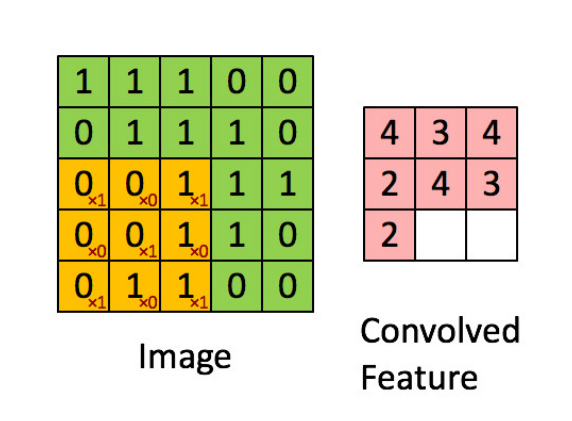

In [34]:
showimg("./Convolution_schematic.jpg")

In [10]:
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, channels, size_x, size_y),
    conv1_num_filters=8, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=16, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    hidden4_num_units=200, hidden5_num_units=200,
    output_num_units=2,
    output_nonlinearity=nonlinearities.softmax,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,
    max_epochs=20,
    verbose=1,
    )
X, yb = load(2000)
net2.fit(X, yb)

# Neural Network with 428754 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    3x48x48
  1  conv1    8x46x46
  2  pool1    8x23x23
  3  conv2    16x22x22
  4  pool2    16x11x11
  5  hidden4  200
  6  hidden5  200
  7  output   2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.70223       0.70429      0.99708      0.53182  4.80s
      2       0.68608       0.70271      0.97633      0.54159  4.82s
      3       0.67861       0.70099      0.96807      0.52493  4.97s
      4       0.67125       0.70039      0.95840      0.55825  4.89s
      5       0.66346       0.70149      0.94580      0.54940  4.90s
      6       0.65389       0.70041      0.93358      0.55526  4.89s
      7       0.64092       0.69839      0.91771      0.54837  4.91s
      8       0.62334       0.69221      0.90051      0.55813  4.90s
      9       0.59859       0.68

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93bed0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93be50>,
     conv1_filter_size=(3, 3), conv1_num_filters=8,
     conv2_filter_size=(2, 2), conv2_num_filters=16, custom_score=None,
     hidden4_num_units=200, hidden5_num_units=200,
     input_shape=(None, 3, 48, 48),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('hidden4', <class 'lasagne.layers.dense.DenseLayer'>), ('hidden5', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=40, more_params={},
     objective=<function objective at 0x7fe38b947ed8>,
     objective_loss_fun

Overfit! We need to add some dropout that can regularize the network.

I have also made this network larger.

In [55]:
net3 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer), # Added Conv layer
        ('pool3', layers.MaxPool2DLayer),
        ('drop1', layers.DropoutLayer), # Added dropout
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 3, size_x, size_y),
    conv1_num_filters=8, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=16, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=32, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    drop1_p = 0.5,
    hidden4_num_units=200, hidden5_num_units=200,
    output_num_units=2,
    output_nonlinearity=nonlinearities.softmax,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,
    max_epochs=40,
    verbose=1,
    )
Xb, yb = load(2000)

net3.fit(Xb, yb)

# Neural Network with 203634 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    3x48x48
  1  conv1    8x46x46
  2  pool1    8x23x23
  3  conv2    16x22x22
  4  pool2    16x11x11
  5  conv3    32x10x10
  6  pool3    32x5x5
  7  drop1    32x5x5
  8  hidden4  200
  9  hidden5  200
 10  output   2

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       0.69960       0.69200      1.01099      0.54366  6.78s
      2       0.69631       0.68647      1.01433      0.58467  6.84s
      3       0.68972       0.68580      1.00571      0.56997  6.59s
      4       0.68890       0.68411      1.00700      0.58950  6.69s
      5       0.68762       0.68284      1.00701      0.56411  6.58s
      6       0.68065       0.68078      0.99981      0.57778  6.58s
      7       0.67615       0.67843      0.99664      0.58169  6.62s
      8       0.66379       0.67322 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93bed0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fe38b93be50>,
     conv1_filter_size=(3, 3), conv1_num_filters=8,
     conv2_filter_size=(2, 2), conv2_num_filters=16,
     conv3_filter_size=(2, 2), conv3_num_filters=32, custom_score=None,
     drop1_p=0.5, hidden4_num_units=200, hidden5_num_units=200,
     input_shape=(None, 3, 48, 48),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('conv1', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool1', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv2', <class 'lasagne.layers.conv.Conv2DLayer'>), ('pool2', <class 'lasagne.layers.pool.MaxPool2DLayer'>), ('conv3', <class..., <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=40, more_params={},
     objective=<function objective at 0x7fe38b947ed8>,
    

Verify results with test data

Predicted Class:
[[ 0.99597677  0.00402323]]
Real Class
0


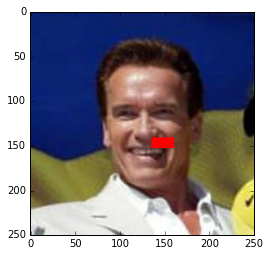

Predicted Class:
[[ 0.17042233  0.82957767]]
Real Class
1


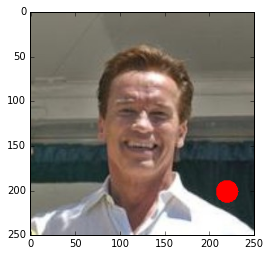

Predicted Class:
[[ 0.01490635  0.98509365]]
Real Class
1


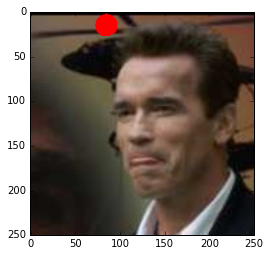

Predicted Class:
[[ 0.25389614  0.74610386]]
Real Class
1


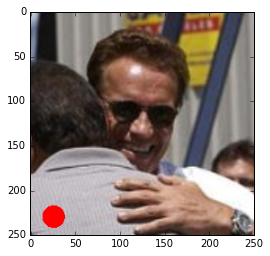

Predicted Class:
[[ 0.99587263  0.00412737]]
Real Class
0


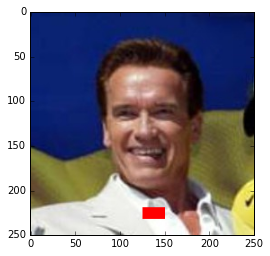

Predicted Class:
[[ 0.44603628  0.55396372]]
Real Class
1


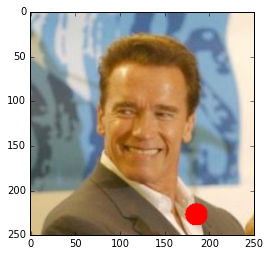

Predicted Class:
[[ 0.99879541  0.00120459]]
Real Class
0


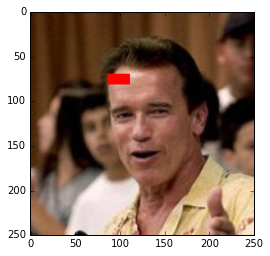

Predicted Class:
[[ 0.99729669  0.00270331]]
Real Class
0


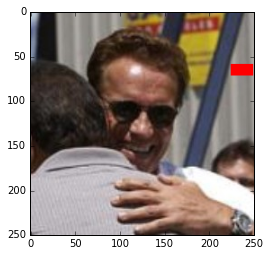

In [63]:
p_len = 8
Xb, yb = load(p_len, seed = 49)
Xb_human, _ = load(p_len, standarize=False, shrink=False, seed = 49)
for i in range(p_len):
    print("Predicted Class:")
    print(net3.predict_proba(Xb[i:i+1]))
    print("Real Class")
    print(yb[i])
    fig, axs = plt.subplots()
    axs.imshow(Xb_human[i].swapaxes(0,2).swapaxes(0,1))
    plt.show()